# Assignment-04-Simple Linear Regression-2

In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
df=pd.read_csv('Salary_Data.csv')
print(df.shape, "\n" ,df.sample(5))

(30, 2) 
     YearsExperience    Salary
24              8.7  109431.0
28             10.3  122391.0
17              5.3   83088.0
3               2.0   43525.0
9               3.7   57189.0


# EDA and VISUALIZATION:-

In [3]:
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [4]:
df.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [5]:
df.mode()

,YearsExperience,Salary
0,3.2,37731.0
1,4.0,39343.0
2,NaN,39891.0
3,NaN,43525.0
4,NaN,46205.0
5,NaN,54445.0
6,NaN,55794.0
7,NaN,56642.0
8,NaN,56957.0
9,NaN,57081.0


In [6]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [7]:
df.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [8]:
Range = df.max() - df.min()
Range

YearsExperience        9.4
Salary             84660.0
dtype: float64

0.37956024064804106


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

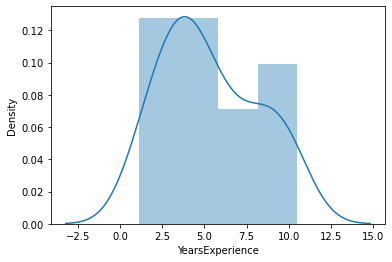

In [9]:
print(df["YearsExperience"].skew())
sns.distplot(df["YearsExperience"])

0.35411967922959153


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

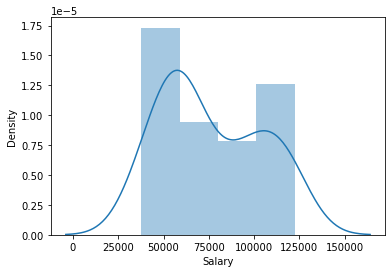

In [11]:
print(df["Salary"].skew())
sns.distplot(df['Salary'])

In [12]:
df.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [13]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Correlation Analysis

In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

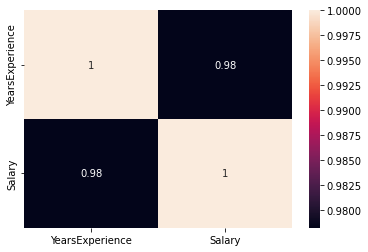

In [16]:
sns.heatmap(df.corr(),annot = True)

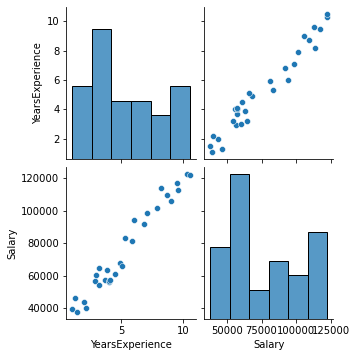

In [17]:
sns.pairplot(df)

# Defining Feature and Target from Dataset:-

In [18]:
x=df['YearsExperience'] # Feature
y=df['Salary'] # Target

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

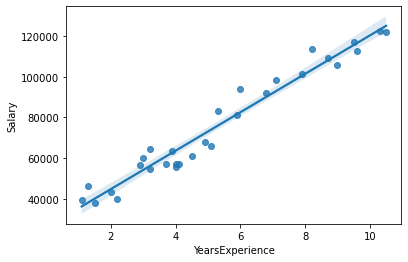

In [19]:
sns.regplot(x,y)

## Model Building

In [20]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

## Model Testing

In [21]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [23]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Predictions

In [24]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [25]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [26]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [28]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# 1. NORMALIZATION (Using MinMax Scaler):-

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,1))
df2_scaled = pd.DataFrame(mm.fit_transform(df))

In [30]:
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Intercept    0.035925
x            0.912037
dtype: float64

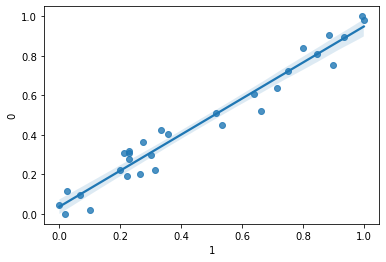

In [31]:
sns.regplot(x,y)
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

In [32]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# 2. Standard Scaler:-

In [34]:
df2 = df
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df2_scaled = pd.DataFrame(ss.fit_transform(df2))

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Intercept   -7.632783e-17
x            9.782416e-01
dtype: float64

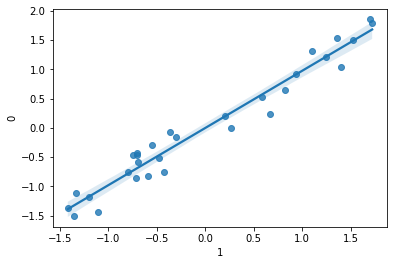

In [35]:
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target
sns.regplot(x,y)
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

In [36]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept   -1.946745e-15
 x            2.495009e+01
 dtype: float64,
 Intercept    1.000000e+00
 x            1.143068e-20
 dtype: float64)

In [37]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# 3. Log transformation:-

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Intercept   -16.490132
x             1.610448
dtype: float64

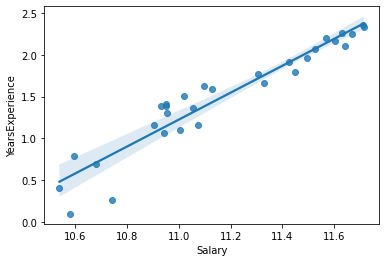

In [38]:
df2_scaled = np.log(df2)
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target
sns.regplot(x,y)
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

In [39]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9052150725817147, 0.9018298966024902)

# 4. Squreroot Transformation:-

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Intercept   -1.161190
x            0.012455
dtype: float64

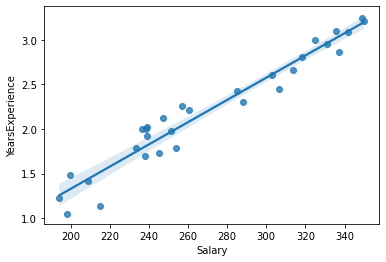

In [40]:
df2_scaled = np.sqrt(df2)
x=df2_scaled.iloc[:,-1] # Feature
y=df2_scaled.iloc[:,0] # Target
sns.regplot(x,y)
model=smf.ols("y~x",data=df2_scaled).fit()
model.params

In [41]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

# Conclution:-
From Above analysis it is clear that "STANDARD SCALER", "NORMALIZATION" give same R2 Score.